#**Imports and Setup Library**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10  # Menggunakan 'figure.figsize' untuk mengatur ukuran gambar
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

#**Generate Data**

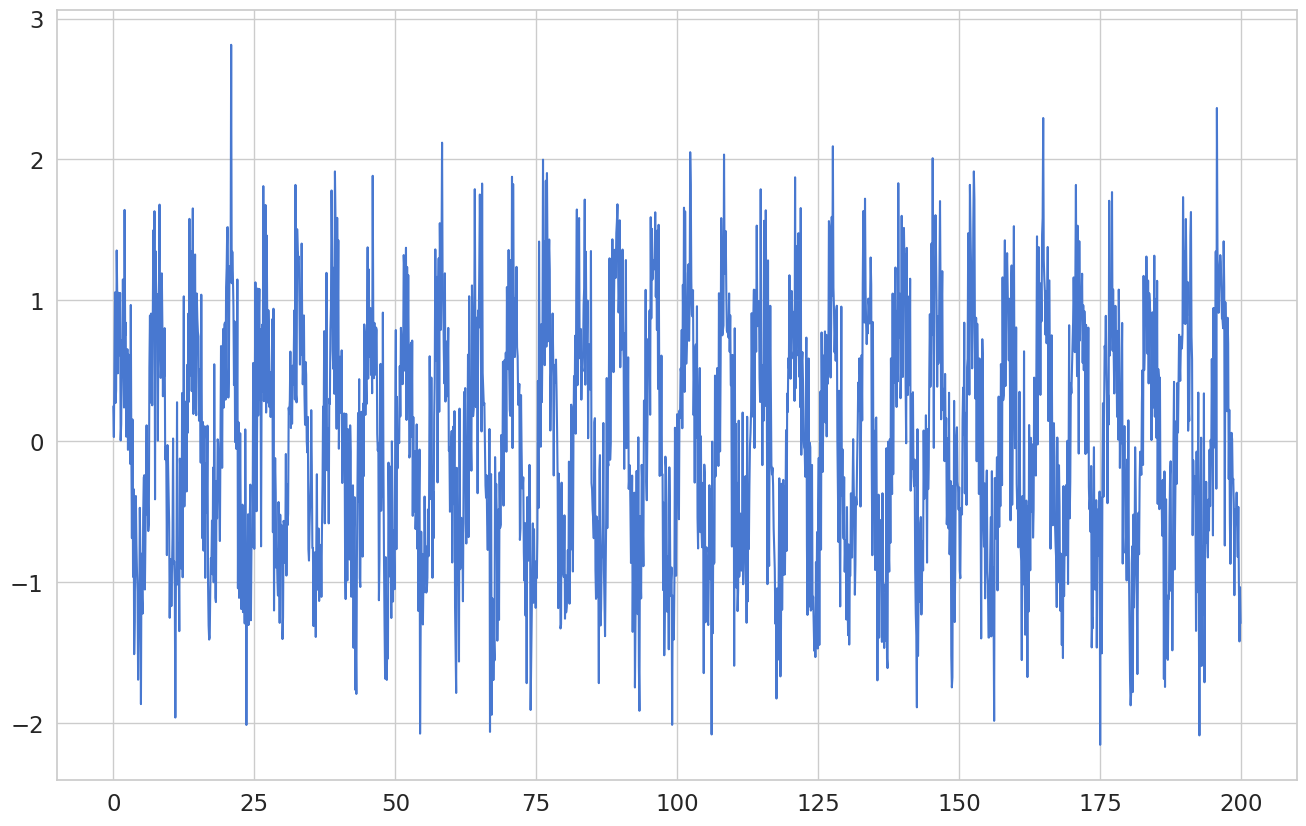

In [2]:
data_time = np.arange(0, 200, 0.1)
sin_values = np.sin(data_time) + np.random.normal(scale=0.5, size=len(data_time))
plt.plot(data_time, sin_values, label='sine (with noise)');

#**Data Pre-processing**

In [3]:
data_full = pd.DataFrame(dict(sine=sin_values), index=data_time, columns=['sine'])
data_full.head()

len_train = int(len(data_full) * 0.8)
len_test = len(data_full) - len_train
train, test = data_full.iloc[0:len_train], data_full.iloc[len_train:len(data_full)]


In [4]:
def gen_data(X, y, num_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)

num_steps = 10
trainX, trainY = gen_data(train, train.sine, num_steps)
testX, testY = gen_data(test, test.sine, num_steps)


#**Implementing the Sequential model**

In [5]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
lstm_model.add(keras.layers.Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))


#**Model Training**

In [6]:
history = lstm_model.fit(
    trainX, trainY,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    shuffle=False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
)


Epoch 1/30
90/90 [==============================] - 12s 44ms/step - loss: 0.3601 - val_loss: 0.3604
Epoch 2/30
90/90 [==============================] - 1s 16ms/step - loss: 0.3176 - val_loss: 0.3570
Epoch 3/30
90/90 [==============================] - 1s 17ms/step - loss: 0.3161 - val_loss: 0.3548
Epoch 4/30
90/90 [==============================] - 2s 17ms/step - loss: 0.3153 - val_loss: 0.3527
Epoch 5/30
90/90 [==============================] - 1s 10ms/step - loss: 0.3146 - val_loss: 0.3504
Epoch 6/30
90/90 [==============================] - 1s 12ms/step - loss: 0.3137 - val_loss: 0.3479
Epoch 7/30
90/90 [==============================] - 1s 12ms/step - loss: 0.3128 - val_loss: 0.3459
Epoch 8/30
90/90 [==============================] - 1s 9ms/step - loss: 0.3121 - val_loss: 0.3445
Epoch 9/30
90/90 [==============================] - 1s 8ms/step - loss: 0.3115 - val_loss: 0.3436
Epoch 10/30
90/90 [==============================] - 1s 8ms/step - loss: 0.3110 - val_loss: 0.3428
Epoch 11/30

#**Evaluation**

13/13 [==============================] - 0s 2ms/step - loss: 0.0000e+00


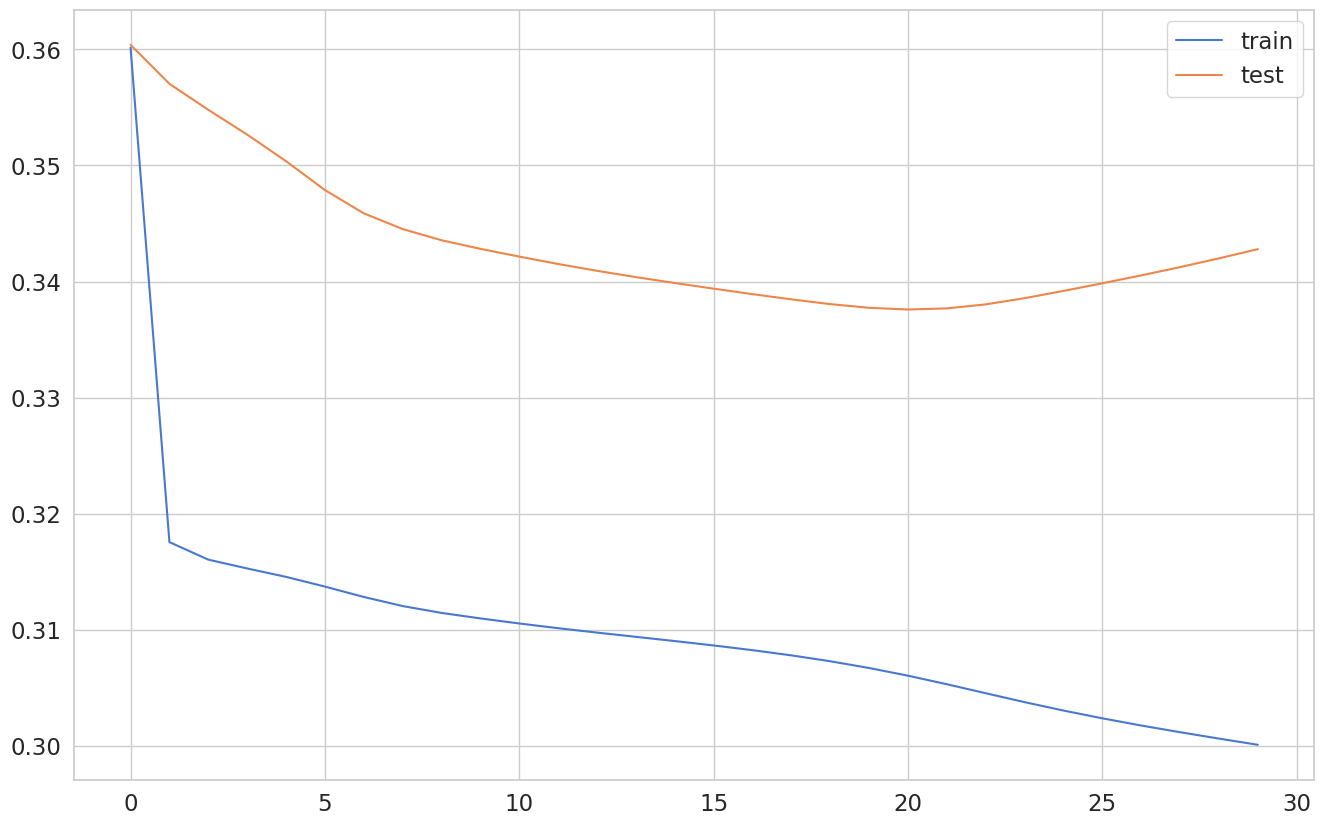

In [7]:
lstm_model.evaluate(testX)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

#**Predicting a new Point in the Future**

13/13 [==============================] - 0s 5ms/step


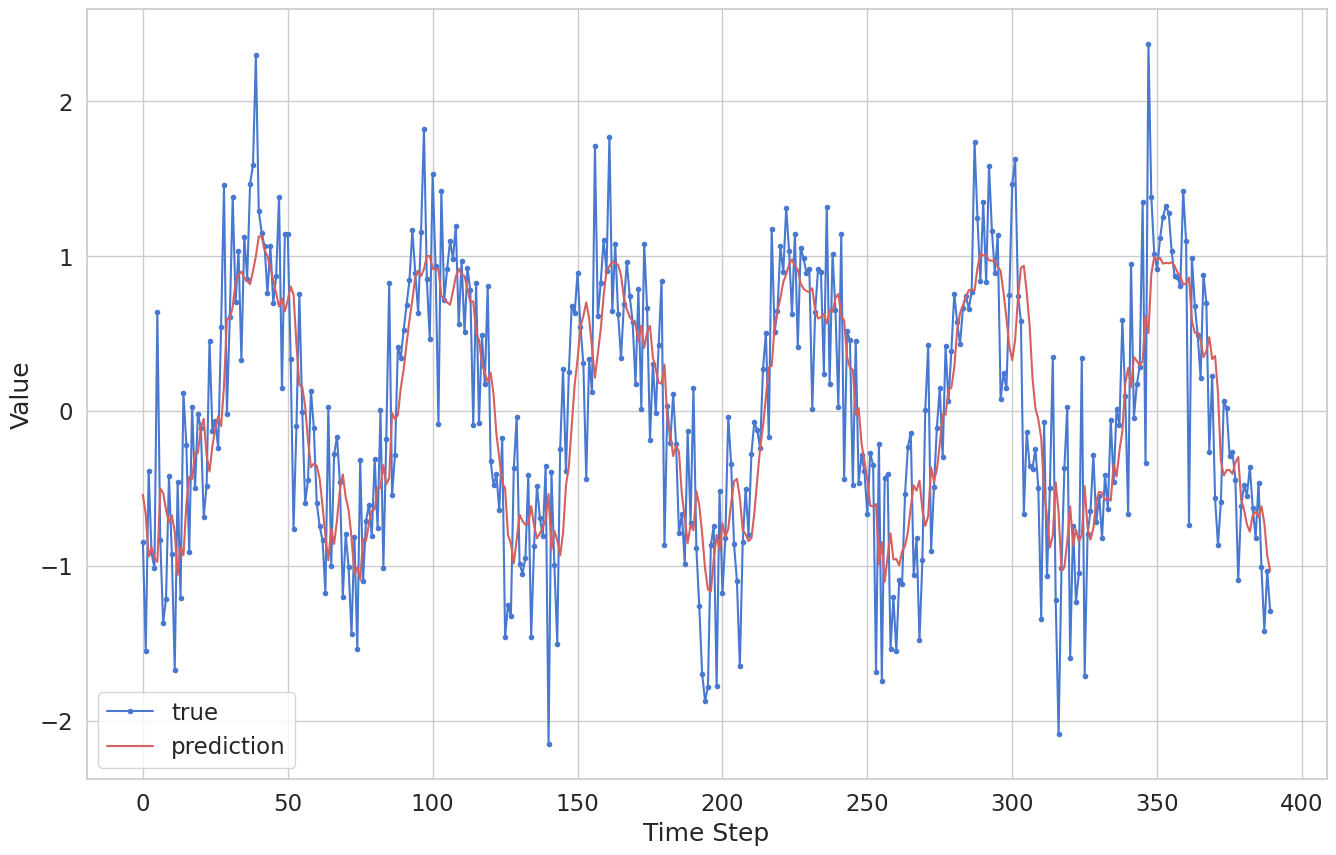

In [8]:
y_pred = lstm_model.predict(testX)
plt.plot(testY, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Menghitung MSE
mse = mean_squared_error(testY, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.3029666309240926
Root Mean Squared Error (RMSE): 0.5504240464624457


In [10]:
from sklearn.metrics import classification_report

# Mengonversi nilai kontinu menjadi biner berdasarkan threshold (misalnya 0.5)
threshold = 0.5
binary_pred = (y_pred >= threshold).astype(int)
binary_testY = (testY >= threshold).astype(int)

# Mencetak classification report
print("Classification Report:")
print(classification_report(binary_testY, binary_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       258
           1       0.78      0.79      0.78       132

    accuracy                           0.85       390
   macro avg       0.83      0.84      0.83       390
weighted avg       0.85      0.85      0.85       390

